# 02. Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

## 1. Make classification data and get it ready

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42)    # keep random so we get the same values

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 X features:\n {X[:5]}")
print(f"First 5 y labels:\n {y[:5]}")

First 5 X features:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 y labels:
 [1 1 1 1 0]


In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

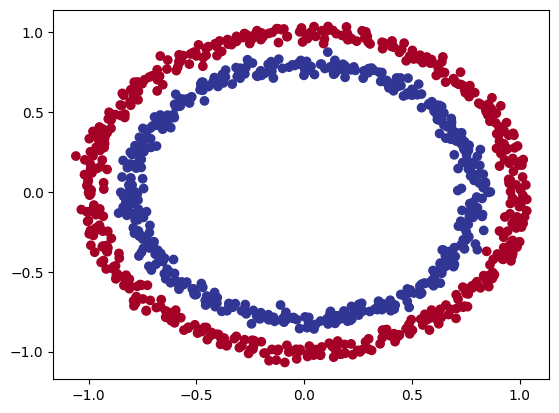

In [7]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

**Note**: The data we're working with is often refered as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [11]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [13]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,    # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [14]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "mps" if torch.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
device

'mps'

Now we've setup device agnostic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [15]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    # 3. Define the forward method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x))    # x -> layer_1 -> layer_2 -> output

# 4. Create an instance of the model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
# Let's replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds[:10]}")
print(f"First 10 actual values:\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
 tensor([[-0.5713],
        [-0.6944],
        [-0.0988],
        [-0.7057],
        [ 0.1386],
        [ 0.0616],
        [-0.4734],
        [-0.2958],
        [-0.1096],
        [-0.7001]], device='mps:0', grad_fn=<SliceBackward0>)
First 10 actual values:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measure how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For different optimizers see `torch.optim`

In [18]:
# Setup the loss function
# loss_fun = nn.BCELoss()   # BCELoss = no sigmoid built-in requires inputs to have gone through a sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss()    # BCEWithLogitsLoss = sigmoid activation function built-in

# Create an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [19]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Train model

To train our model, we're going to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilites -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [20]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.5713],
        [-0.6944],
        [-0.0988],
        [-0.7057],
        [ 0.1386]], device='mps:0')

In [21]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [22]:
# Use sigmoid function activation on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3609],
        [0.3330],
        [0.4753],
        [0.3305],
        [0.5346]], device='mps:0')

For our prediction probability values, we need to perform a range-style rouding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [23]:
# Find the predicted labels (round the prediction probabilites)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='mps:0')


tensor([0., 0., 0., 0., 1.], device='mps:0')

In [24]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing label

In [25]:
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze()   # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits))   # turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train)    # BCEWithLogitsLoss expects prediction probabilities as input
    loss = loss_fn(y_logits,    # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_train, y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards (backpropagation)
    loss.backward()

    # 5.Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate test loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 0.71365 | Train Acc: 47.50% | Test Loss: 0.70212 | Test Acc: 49.50%
Epoch: 10 | Train Loss: 0.70405 | Train Acc: 47.50% | Test Loss: 0.69450 | Test Acc: 52.50%
Epoch: 20 | Train Loss: 0.69998 | Train Acc: 48.38% | Test Loss: 0.69191 | Test Acc: 53.00%
Epoch: 30 | Train Loss: 0.69791 | Train Acc: 48.88% | Test Loss: 0.69102 | Test Acc: 53.00%
Epoch: 40 | Train Loss: 0.69667 | Train Acc: 49.12% | Test Loss: 0.69077 | Test Acc: 52.50%
Epoch: 50 | Train Loss: 0.69583 | Train Acc: 49.25% | Test Loss: 0.69077 | Test Acc: 52.50%
Epoch: 60 | Train Loss: 0.69523 | Train Acc: 49.12% | Test Loss: 0.69088 | Test Acc: 54.00%
Epoch: 70 | Train Loss: 0.69477 | Train Acc: 48.75% | Test Loss: 0.69104 | Test Acc: 54.50%
Epoch: 80 | Train Loss: 0.69443 | Train Acc: 49.25% | Test Loss: 0.69123 | Test Acc: 54.00%
Epoch: 90 | Train Loss: 0.69416 | Train Acc: 49.50% | Test Loss: 0.69143 | Test Acc: 54.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it, let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()`

In [26]:
import requests
from pathlib import Path

# Download the helper function script
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "w") as file:
        file.write(request.text)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download...


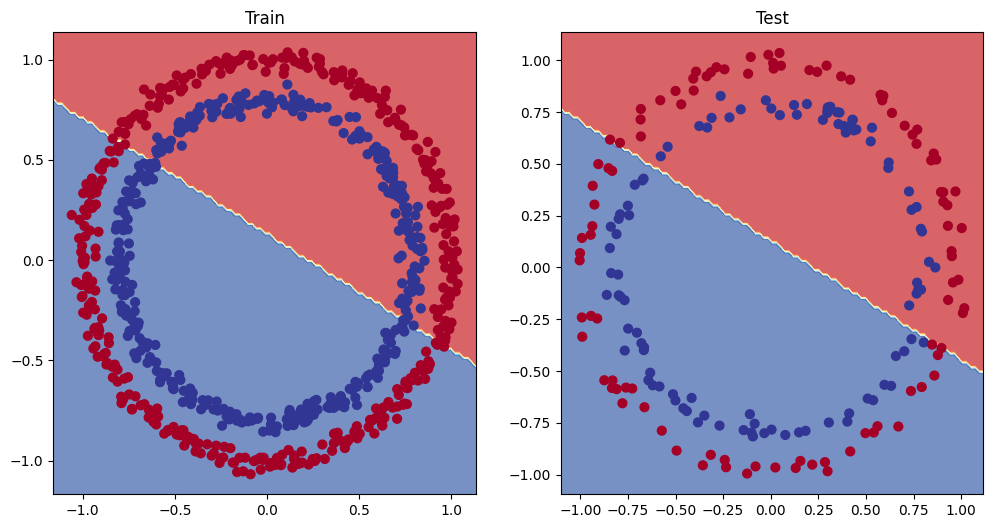

In [27]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X=X_test, y=y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are refered as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [28]:
class CirclemodelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x):   # note: always make sure forward is spelt correctly
        # Creating a module like this is the same as below, though below
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))  # this way of writing operations leverages spend ups where possible behind the scenes
    
model_1 = CirclemodelV1().to(device)
model_1

CirclemodelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
# Create a loss function
# loss_fn = nn.BCELoss()    # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss()    # Doesn't require sigmoid on input
# Create an optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [30]:
# Writing a training and evaluation loop for model_1
torch.manual_seed(42)

# Train for longer
epochs = 1000

# Put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))   # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    # Print out what's happening every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.69396 | Train Acc: 50.88 | Test Loss: 0.69261 | Test Acc: 51.00
Epoch: 100 | Train Loss: 0.69305 | Train Acc: 50.38 | Test Loss: 0.69379 | Test Acc: 48.00
Epoch: 200 | Train Loss: 0.69299 | Train Acc: 51.12 | Test Loss: 0.69437 | Test Acc: 46.00
Epoch: 300 | Train Loss: 0.69298 | Train Acc: 51.62 | Test Loss: 0.69458 | Test Acc: 45.00
Epoch: 400 | Train Loss: 0.69298 | Train Acc: 51.12 | Test Loss: 0.69465 | Test Acc: 46.00
Epoch: 500 | Train Loss: 0.69298 | Train Acc: 51.00 | Test Loss: 0.69467 | Test Acc: 46.00
Epoch: 600 | Train Loss: 0.69298 | Train Acc: 51.00 | Test Loss: 0.69468 | Test Acc: 46.00
Epoch: 700 | Train Loss: 0.69298 | Train Acc: 51.00 | Test Loss: 0.69468 | Test Acc: 46.00
Epoch: 800 | Train Loss: 0.69298 | Train Acc: 51.00 | Test Loss: 0.69468 | Test Acc: 46.00
Epoch: 900 | Train Loss: 0.69298 | Train Acc: 51.00 | Test Loss: 0.69468 | Test Acc: 46.00


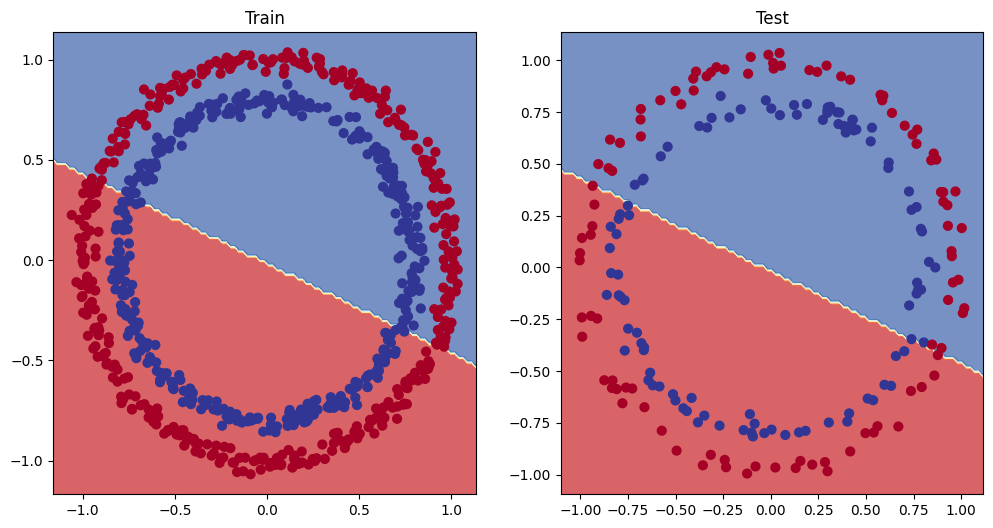

In [31]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X=X_test, y=y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way is to troubleshoot to a larger problem is to test out a smaller problem

In [32]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [33]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))  # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression))

80 80 20 20


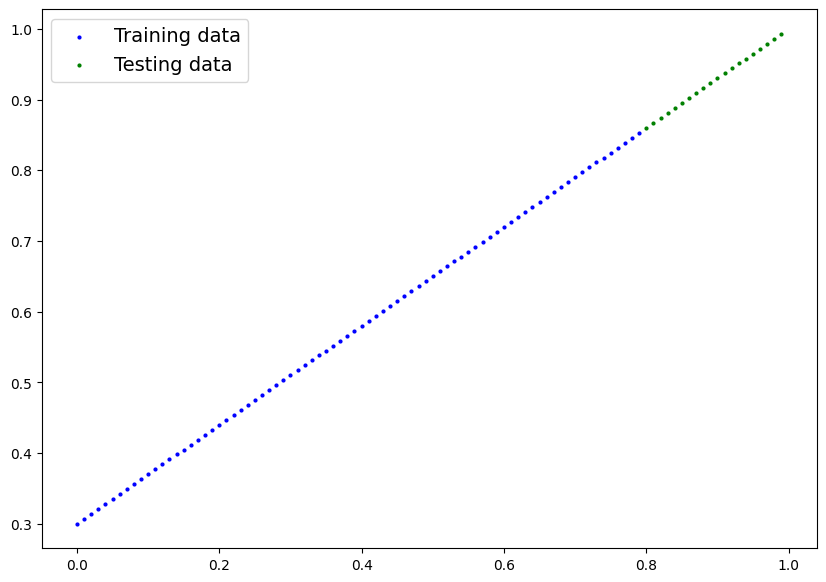

In [34]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [35]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
# Loss and optimizer
loss_fn = nn.L1Loss()    # L1Loss for regression
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [37]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)

    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_loss = loss_fn(model_2(X_test_regression), y_test_regression)
    # Print out what's happening every 100
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 0.75986 | Test Loss: 0.54143
Epoch: 100 | Train Loss: 0.09309 | Test Loss: 0.02901
Epoch: 200 | Train Loss: 0.07376 | Test Loss: 0.02850
Epoch: 300 | Train Loss: 0.06745 | Test Loss: 0.00615
Epoch: 400 | Train Loss: 0.06107 | Test Loss: 0.02004
Epoch: 500 | Train Loss: 0.05698 | Test Loss: 0.01061
Epoch: 600 | Train Loss: 0.04857 | Test Loss: 0.01326
Epoch: 700 | Train Loss: 0.06109 | Test Loss: 0.02127
Epoch: 800 | Train Loss: 0.05599 | Test Loss: 0.01426
Epoch: 900 | Train Loss: 0.05571 | Test Loss: 0.00603


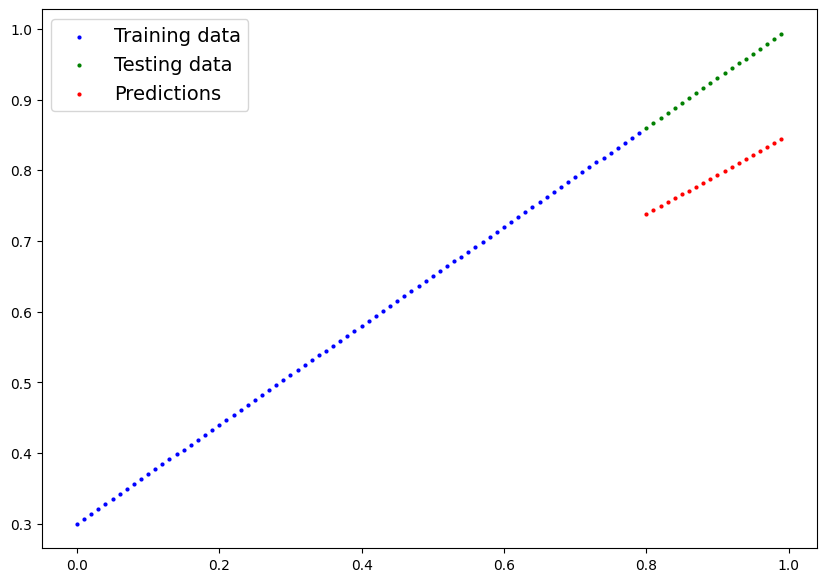

In [38]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu()
)

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

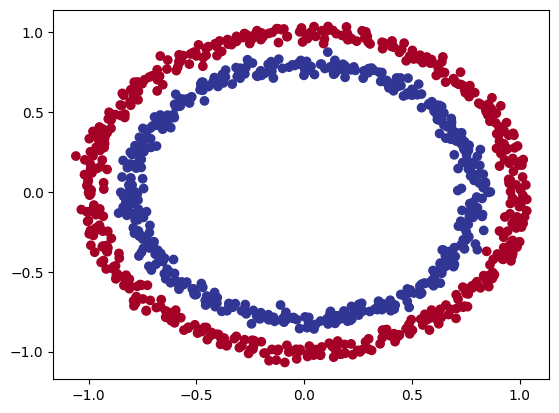

In [39]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [40]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split data into training and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight linear
* Non-linear = non straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [41]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()   # <- add in ReLU activation function
        # Can also put sigmoid here in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [42]:
# Setups loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linearity

In [43]:
# Random seeds
torch.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through epochs
epochs = 1000

for epoch in range(epochs):
    ### Training
    model_3.train()
    
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))   # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)   # BCEWithLogitsLoss (takes in logits as first input)
    acc = accuracy_fn(y_train, y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    # Print out what's happenin'
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.69295 | Train Acc: 50.00 | Test Loss: 0.69394 | Test Acc: 50.00
Epoch: 100 | Train Loss: 0.00168 | Train Acc: 100.00 | Test Loss: 0.00744 | Test Acc: 100.00
Epoch: 200 | Train Loss: 0.00071 | Train Acc: 100.00 | Test Loss: 0.00543 | Test Acc: 100.00
Epoch: 300 | Train Loss: 0.00041 | Train Acc: 100.00 | Test Loss: 0.00493 | Test Acc: 100.00
Epoch: 400 | Train Loss: 0.00026 | Train Acc: 100.00 | Test Loss: 0.00573 | Test Acc: 100.00
Epoch: 500 | Train Loss: 0.00018 | Train Acc: 100.00 | Test Loss: 0.00516 | Test Acc: 100.00
Epoch: 600 | Train Loss: 0.00013 | Train Acc: 100.00 | Test Loss: 0.00513 | Test Acc: 100.00
Epoch: 700 | Train Loss: 0.00010 | Train Acc: 100.00 | Test Loss: 0.00534 | Test Acc: 100.00
Epoch: 800 | Train Loss: 0.00008 | Train Acc: 100.00 | Test Loss: 0.00560 | Test Acc: 100.00
Epoch: 900 | Train Loss: 0.00007 | Train Acc: 100.00 | Test Loss: 0.00577 | Test Acc: 100.00


### 6.4 Evaluating a mdoel trained with non-linear activation functions

In [44]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

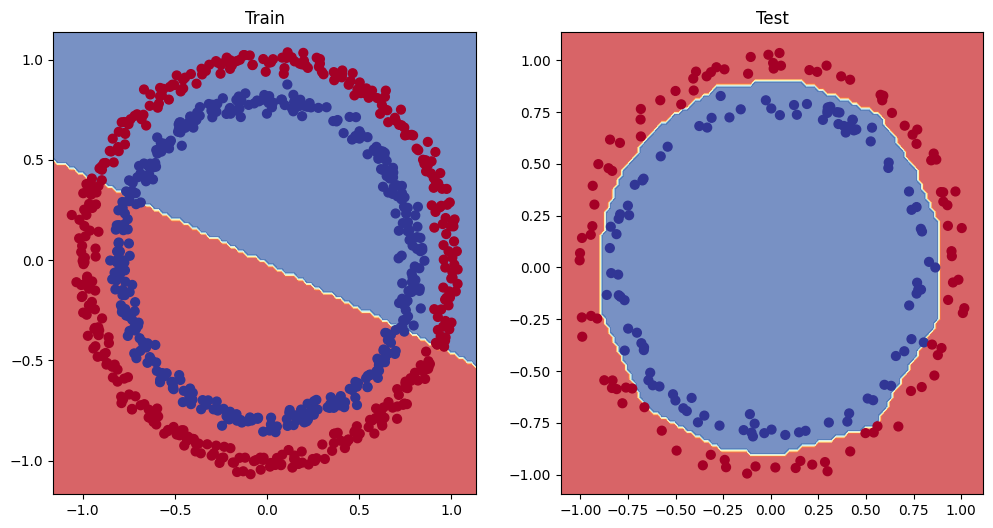

In [45]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X=X_train, y=y_train)   # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X=X_test, y=y_test) # model_3 = has non-linearity

**Challenge** Can you improve model_3 to do better than 80% accuracy on the test data?

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions

In [46]:
# Create a tensor
A = torch.arange(-10, 10, 1.)   # torch.arange(-10, 10, 1, dtype=torch.float32)
A, A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

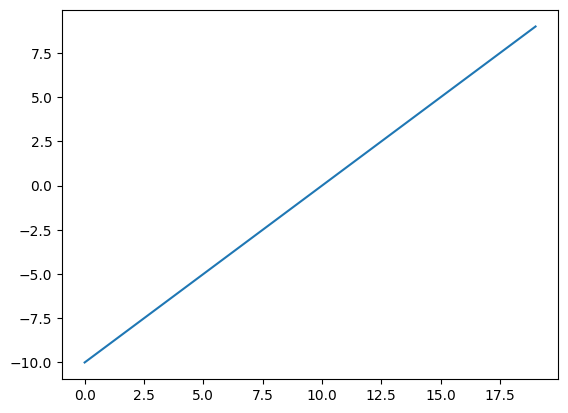

In [47]:
# Visualize the tensor
plt.plot(A)

In [48]:
def relu(x: torch.tensor) -> torch.Tensor:
    return torch.maximum(x, torch.tensor(0.0))  # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

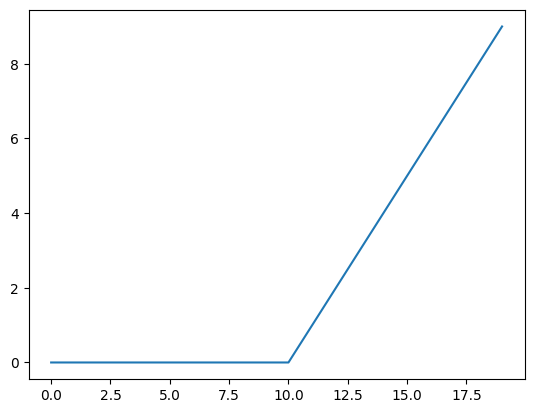

In [49]:
# Plot ReLU activation function
plt.plot(relu(A))

In [50]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

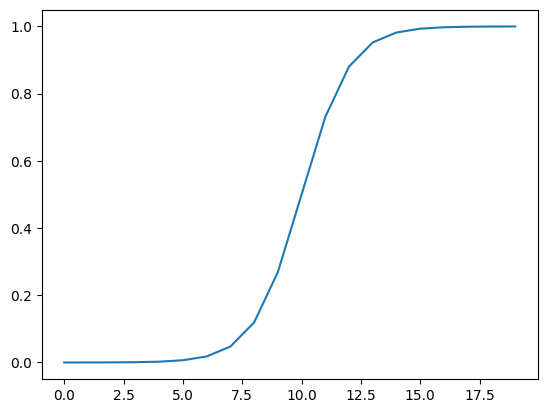

In [51]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)

* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


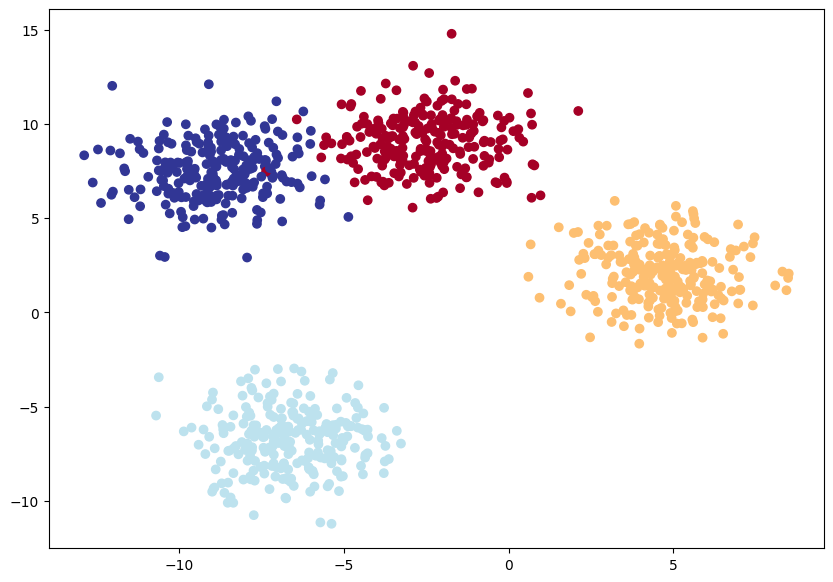

In [52]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES, 
                            centers=NUM_CLASSES, 
                            cluster_std=1.5,    # give the clusters a little shake up
                            random_state=RANDOM_SEED)
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split data into training and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. Plot data (Visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch

In [53]:
device = "mps" if torch.mps.is_available() else "cpu"
device

'mps'

In [54]:
# Build a multi-class classification model
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """
        Initialize multi-class classification model.
        
        Args:
            input features (int): Number of input features to the model
            output features (int): Number of output features (number of outputs classes)
            hidden_units (int): Number of hidden units between layers, default 8
        
        Returns:
        
        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8).to(device)
model_4
        

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [55]:
# Create a loss function for multi-class classification - loss function measures how wrong model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)    # learning rate is a hyperparameter you can change

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [56]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_train.to(device))
y_logits[:10]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804],
        [-0.5073, -1.2865, -0.7239,  0.3814],
        [ 0.6031, -1.6200,  0.4522,  1.5135],
        [-0.9233, -0.5593, -1.0775, -0.4963],
        [ 1.7228, -1.0307,  1.7717,  1.9579],
        [ 0.5619, -1.4183,  0.4359,  1.3289]], device='mps:0')

In [57]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='mps:0')
tensor([[0.1838, 0.3422, 0.1500, 0.3239],
        [0.2199, 0.0377, 0.1839, 0.5586],
        [0.3406, 0.0482, 0.5326, 0.0785],
        [0.3405, 0.0657, 0.4446, 0.1492],
        [0.2527, 0.0424, 0.2283, 0.4766]], device='mps:0')


In [58]:
# Convert our model's prediction probabilities to prediction labels
y_preds_test = torch.argmax(y_pred_probs, dim=1)
y_preds_test

tensor([1, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 1,
        3, 2, 3, 3, 1, 3, 3, 1, 1, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3,
        1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 1, 3, 2, 2, 2, 1, 3, 2,
        3, 3, 1, 1, 2, 3, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1, 3, 3, 3, 2, 1,
        3, 1, 2, 1, 3, 3, 3, 3, 2, 1, 2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2,
        3, 3, 2, 2, 3, 1, 2, 3, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 2,
        3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
        2, 2, 2, 3, 3, 1, 1, 3, 1, 2, 3, 3, 2, 1, 3, 2, 3, 3, 3, 1, 3, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2,
        3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 3, 1, 1, 3, 2,
        2, 3, 1, 3, 1, 2, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3,
        2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 3,

In [59]:
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [60]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='mps:0')

In [61]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1838, 0.3422, 0.1500, 0.3239], device='mps:0')
tensor(1, device='mps:0')


### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [62]:
# Fit the multi-class model to the data
torch.manual_seed(42)
# Set number of epochs
epochs = 100

# Put the data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
    ### Training
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)
        
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_blob_test, test_pred)
    
    # Print out what's happenin'
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Train Loss: 1.04324 | Train Acc: 65.50 | Test Loss: 0.57861 | Test Acc: 95.50
Epoch: 10 | Train Loss: 0.14398 | Train Acc: 99.12 | Test Loss: 0.13037 | Test Acc: 99.00
Epoch: 20 | Train Loss: 0.08062 | Train Acc: 99.12 | Test Loss: 0.07216 | Test Acc: 99.50
Epoch: 30 | Train Loss: 0.05924 | Train Acc: 99.12 | Test Loss: 0.05133 | Test Acc: 99.50
Epoch: 40 | Train Loss: 0.04892 | Train Acc: 99.00 | Test Loss: 0.04098 | Test Acc: 99.50
Epoch: 50 | Train Loss: 0.04295 | Train Acc: 99.00 | Test Loss: 0.03486 | Test Acc: 99.50
Epoch: 60 | Train Loss: 0.03910 | Train Acc: 99.00 | Test Loss: 0.03083 | Test Acc: 99.50
Epoch: 70 | Train Loss: 0.03643 | Train Acc: 99.00 | Test Loss: 0.02799 | Test Acc: 99.50
Epoch: 80 | Train Loss: 0.03448 | Train Acc: 99.00 | Test Loss: 0.02587 | Test Acc: 99.50
Epoch: 90 | Train Loss: 0.03300 | Train Acc: 99.12 | Test Loss: 0.02423 | Test Acc: 99.50


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7643],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5919, -18.5990,  25.5310,  17.5800],
        [  7.3142,   0.7197, -11.2018,  -1.2011]], device='mps:0')

In [68]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
# Go from prediction probs -> pred labels
y_preds = y_pred_probs.argmax(dim=1)
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_blob_test, y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='mps:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='mps:0')
Test accuracy: 99.5%


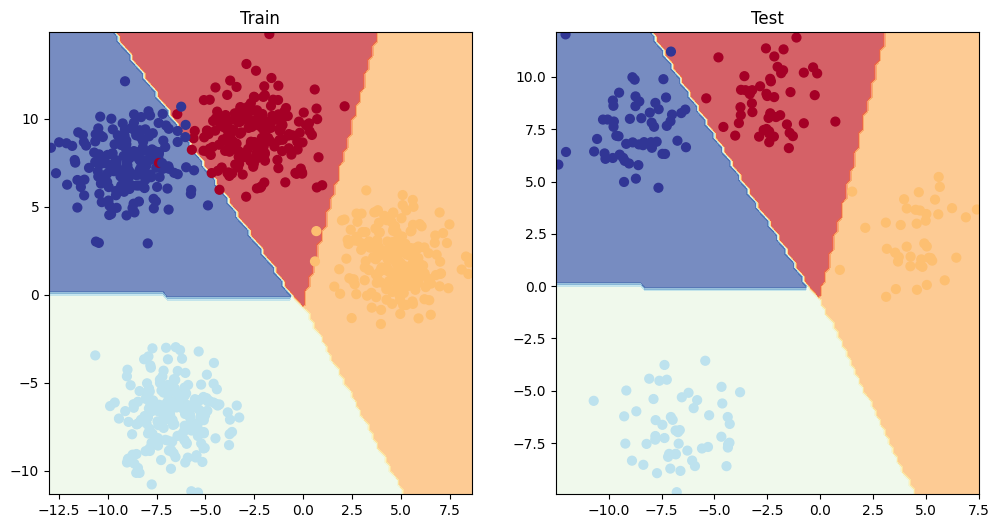

In [65]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_blob_train, y=y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_blob_test, y=y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [69]:
from torchmetrics import Accuracy
# torchmetrics.Accuracy() or sklearn.metrics.accuracy_score()   Default metric for classification problems. Not the best for imbalanced classes.
# torchmetrics.Precision() or sklearn.metrics.precision_score() Higher precision leads to less false positives.
# torchmetrics.Recall() or sklearn.metrics.recall_score()       Higher recall leads to less false negatives.
# torchmetrics.F1Score() or sklearn.metrics.f1_score()          Combination of precision and recall, usually a good overall metric for a classification model.
# torchmetrics.ConfusionMatric()                                When comparing predictions to truth labels to see where model gets confused. Can be hard to use with large numbers of classes.
from typing import Literal

# print(torch.unique(y_blob_test))

# Calculate accuracy
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)
acc = torchmetrics_accuracy(y_preds, y_blob_test)
print(f"Accuracy: {acc.item()}")

Accuracy: 0.9950000047683716
